In [12]:
import scipy.io

# 讀取 .mat 檔案
data = scipy.io.loadmat(r'D:\NYCU\Introduction to Artificial Intelligence\HW1\Project\JS00001.mat')

# 查看檔案中的變數
print(data.keys())

dict_keys(['val'])


In [13]:
# 檢視 ECG 變數的內容
ecg_data = data['val']
print(ecg_data)

[[-254 -254 -254 ...  -34   24    5]
 [ 264  264  264 ...  -68  -49  -34]
 [ 517  517  517 ...  -34  -73  -39]
 ...
 [ 810  810  810 ... -205 -200 -171]
 [ 810  810  810 ... -200 -195 -166]
 [ 527  527  527 ...  102   93  112]]


In [31]:
# 假設 `ecg_data` 是 `data['ECG']`
gender = ecg_data[0][0][0]       # 存取性別資訊
age = ecg_data[0][0][1][0][0]    # 存取年齡資訊
ecg_signal = ecg_data[0][0][2]   # 存取 ECG 訊號數據

print("Gender:", gender)
print("Age:", age)
print("ECG Signal Data Shape:", ecg_signal.shape)
print("ECG Signal (First 5 rows):", ecg_signal[:5])

Gender: ['Male']
Age: 74
ECG Signal Data Shape: (12, 7500)
ECG Signal (First 5 rows): [[ 0.0282288   0.0392288   0.0452288  ...  0.2582288   0.2592288
   0.2592288 ]
 [ 0.00672947  0.01072947  0.01472947 ...  0.24772947  0.24872947
   0.24972947]
 [-0.02149933 -0.02849933 -0.03049933 ... -0.01049933 -0.01049933
  -0.00949933]
 [-0.01749067 -0.02449067 -0.02949067 ... -0.25249067 -0.25449067
  -0.25449067]
 [ 0.0243552   0.0333552   0.0383552  ...  0.1343552   0.1343552
   0.1343552 ]]


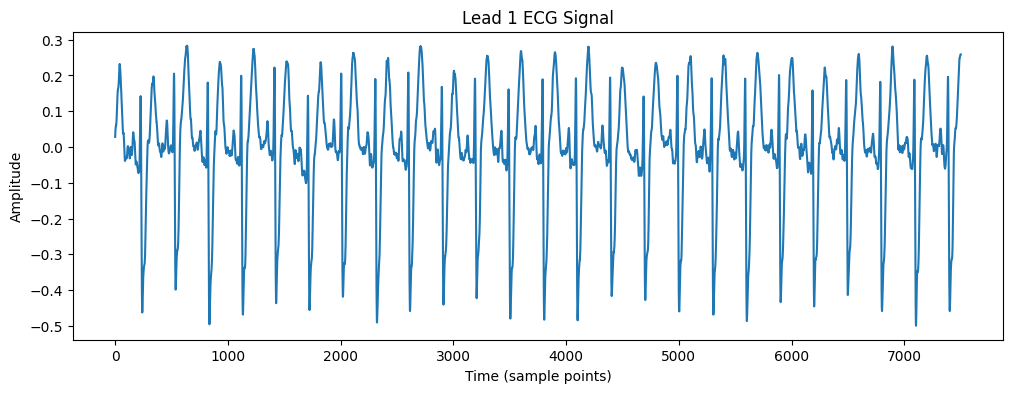

In [18]:
import matplotlib.pyplot as plt

# 選取第一個導聯的數據（第 0 列）
lead_1_signal = ecg_signal[0]

# 繪製第一個導聯的 ECG 訊號
plt.figure(figsize=(12, 4))
plt.plot(lead_1_signal)
plt.title("Lead 1 ECG Signal")
plt.xlabel("Time (sample points)")
plt.ylabel("Amplitude")
plt.show()

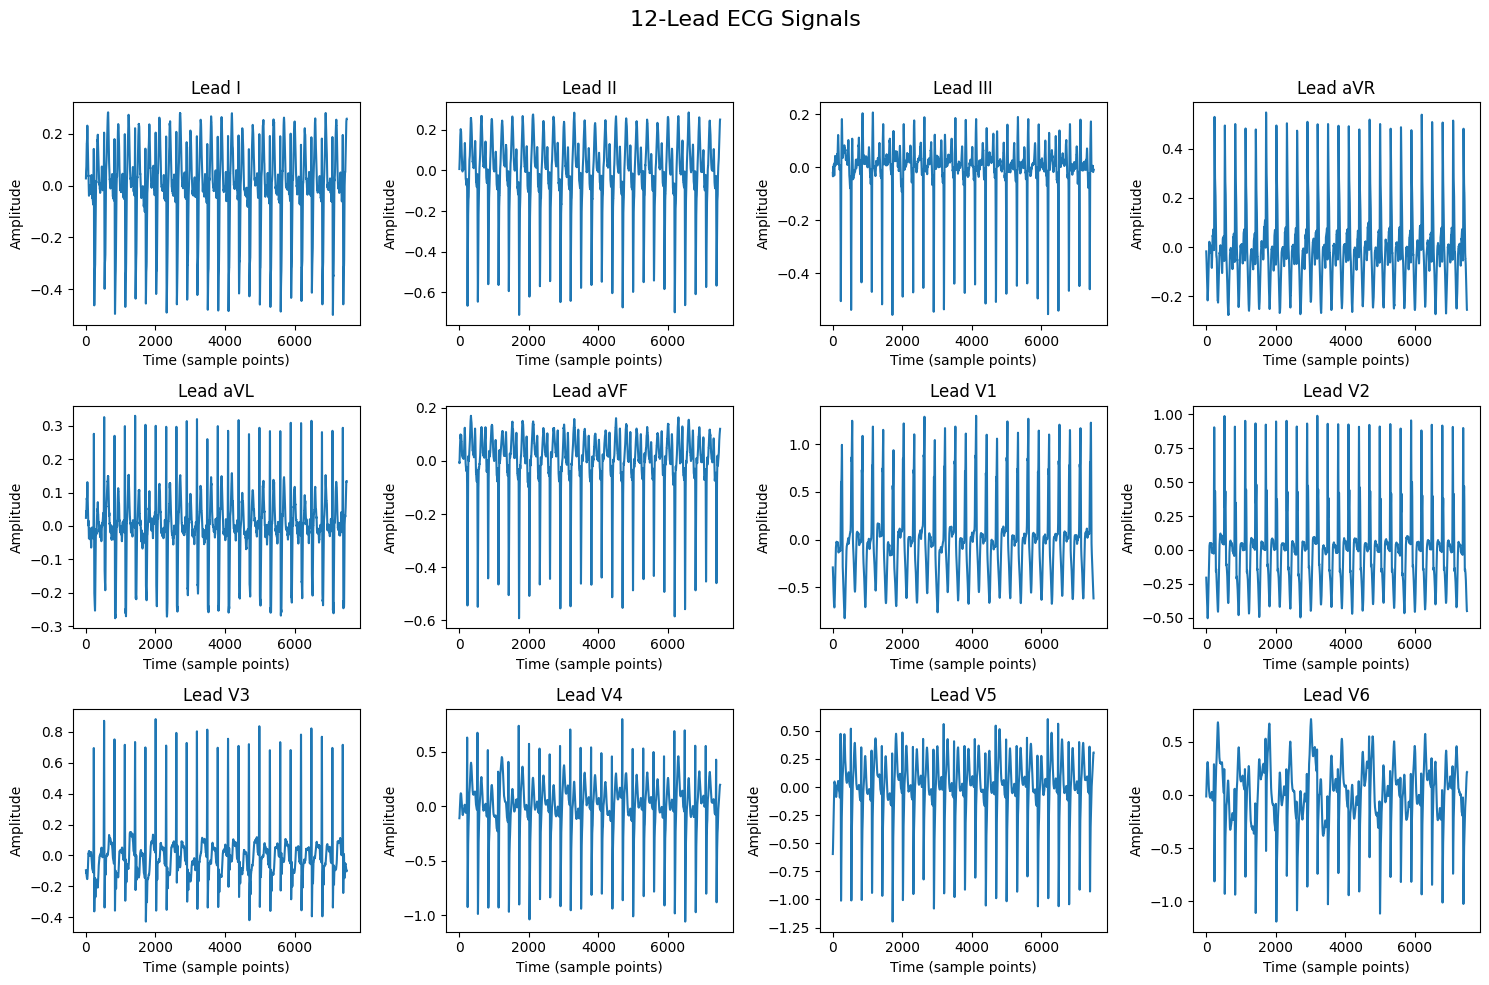

In [20]:
import matplotlib.pyplot as plt

# 12 導聯的標準名稱順序
lead_names = ["Lead I", "Lead II", "Lead III", "Lead aVR", "Lead aVL", "Lead aVF",
              "Lead V1", "Lead V2", "Lead V3", "Lead V4", "Lead V5", "Lead V6"]

# 設定子圖的網格大小（3 行 x 4 列），以適合 12 導聯
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("12-Lead ECG Signals", fontsize=16)

# 遍歷 12 個導聯的數據並繪製
for i in range(12):
    row = i // 4  # 確定子圖的行
    col = i % 4   # 確定子圖的列
    axes[row, col].plot(ecg_signal[i])
    axes[row, col].set_title(lead_names[i])
    axes[row, col].set_xlabel("Time (sample points)")
    axes[row, col].set_ylabel("Amplitude")

# 調整子圖之間的間距
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
import wfdb

record_name = r'D:\NYCU\Introduction to Artificial Intelligence\HW1\Project\JS00001'

record = wfdb.rdrecord(record_name)

record.__dict__

{'record_name': 'JS00001',
 'n_sig': 12,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 5000,
 'base_time': None,
 'base_date': None,
 'comments': ['Age: 85',
  'Sex: Male',
  'Dx: 164889003,59118001,164934002',
  'Rx: Unknown',
  'Hx: Unknown',
  'Sx: Unknown'],
 'sig_name': ['I',
  'II',
  'III',
  'aVR',
  'aVL',
  'aVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'p_signal': array([[-0.254,  0.264,  0.517, ...,  0.81 ,  0.81 ,  0.527],
        [-0.254,  0.264,  0.517, ...,  0.81 ,  0.81 ,  0.527],
        [-0.254,  0.264,  0.517, ...,  0.81 ,  0.81 ,  0.527],
        ...,
        [-0.034, -0.068, -0.034, ..., -0.205, -0.2  ,  0.102],
        [ 0.024, -0.049, -0.073, ..., -0.2  , -0.195,  0.093],
        [ 0.005, -0.034, -0.039, ..., -0.171, -0.166,  0.112]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['JS00001.mat',
  'JS00001.mat',
  'JS00001.mat',
  'JS00001.mat',
  'JS00001.mat',
  'JS00001.mat',
  'JS00001.mat',
  '

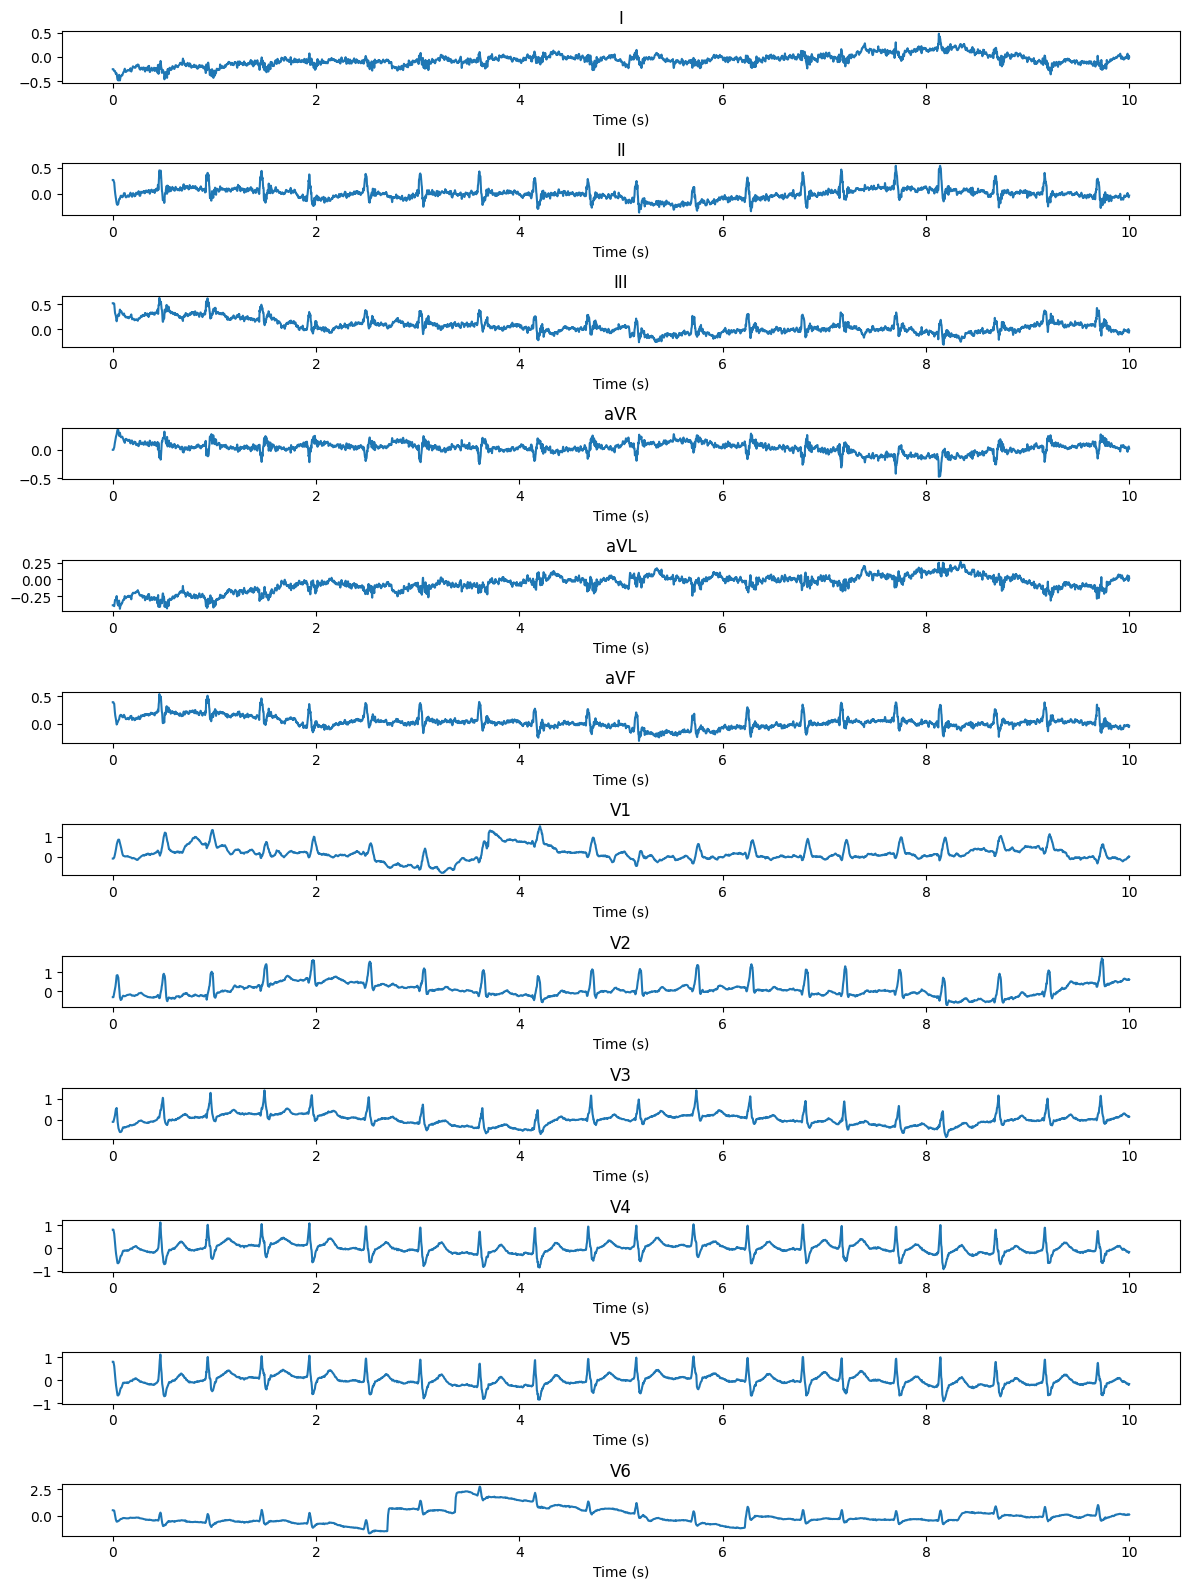

In [20]:
import matplotlib.pyplot as plt
import wfdb

# 設定記錄檔名
record_name = r'D:\NYCU\Introduction to Artificial Intelligence\HW1\Project\JS00001'

# 讀取記錄
record = wfdb.rdrecord(record_name)

# 擷取信號數據和取樣頻率
p_signal = record.p_signal  # 各導聯的信號數據
fs = record.fs  # 取樣頻率
sig_len = record.sig_len  # 信號長度
time = [i / fs for i in range(sig_len)]  # 時間軸

# 繪製所有導聯
plt.figure(figsize=(12, 16))
for i, lead_name in enumerate(record.sig_name):
    plt.subplot(len(record.sig_name), 1, i + 1)  # 每個導聯單獨一行
    plt.plot(time, p_signal[:, i])  # 繪製第 i 個導聯
    plt.title(lead_name)  # 標題顯示導聯名稱
    plt.xlabel('Time (s)')
    

# 調整圖像排版
plt.tight_layout()
plt.show()